<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data-science2/blob/main/Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Word2Vec is a popular algorithm used in natural language processing (NLP) to convert words into vector representations (i.e., numerical form) such that similar words have similar vectors.**

Here below is given how king can be expressed in terms of vector and similarly goes for the horse just below the king.

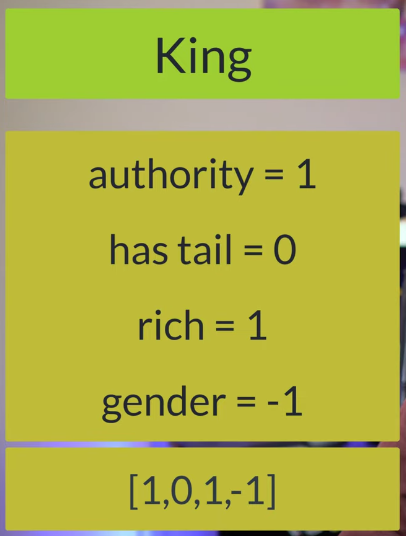

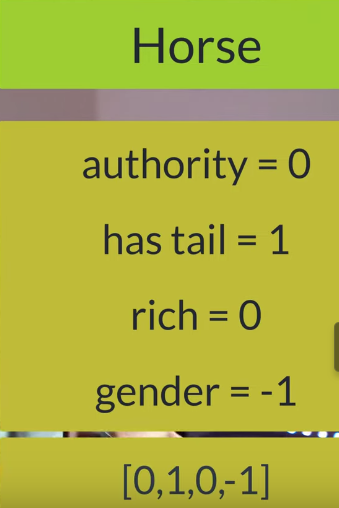

Below is given large number of words and classes . when you simplify the words like king-man_woman = queen . you will get the vector that is similar to the queen.

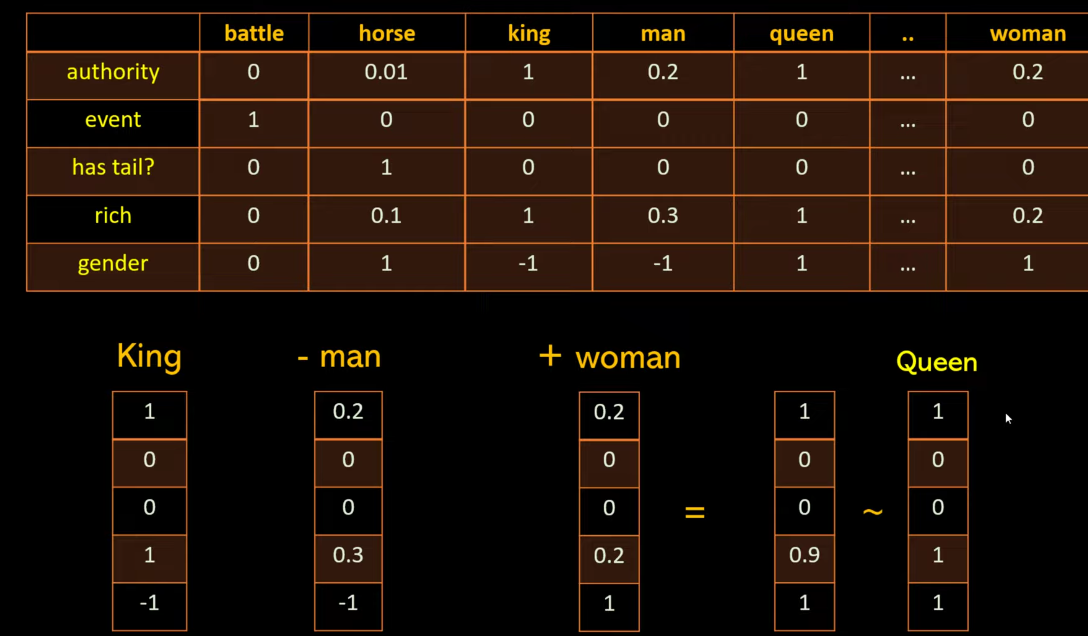

All these values are calculated during the neural network training. While calculating the feature vectors you can't realize the classes are what?  
Now what we do?
1) Take a fake problem
2) Solve it using  neural network
3) You get word embeddings as a side effect .

Fake problem? -> that actually means fill a missing word in a sentence .  

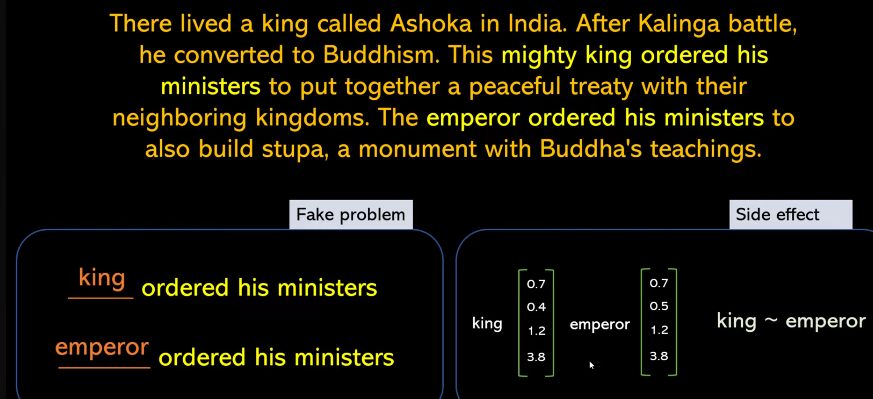

Our area of words is not to fill the empty space but aside learn the word embeddnigs.
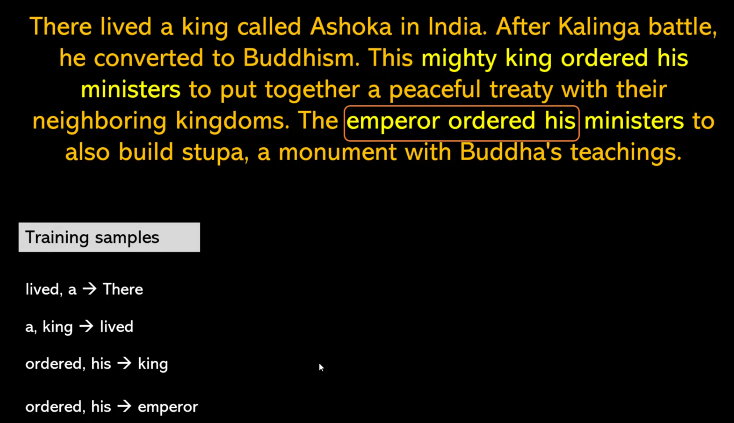

Above problem is for self supervised learning since we had a paragraph and we generated a paragraph.
look out here example how nn works :
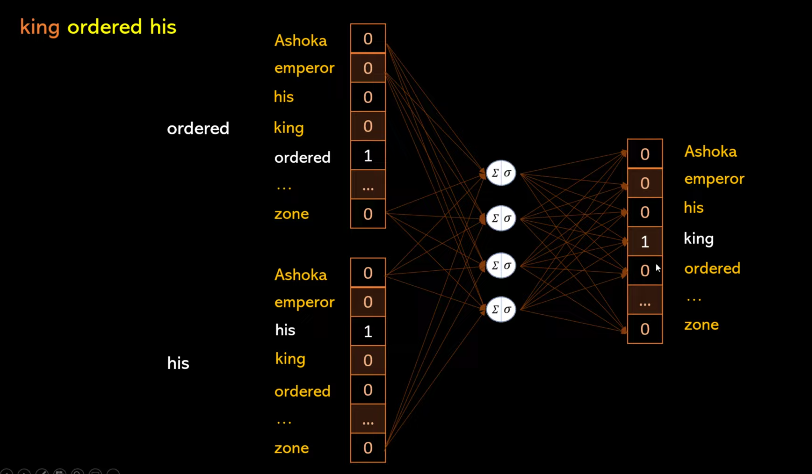

For all other training samples it will work like this . After running so many epochs the weights vectors are not trained . so let us say the vectors of king is updated and hence the emperror too. At the end the king and emperor have the same vectors.
**This process is called the CBOW i.e. C ontinuous Bag Of Words**


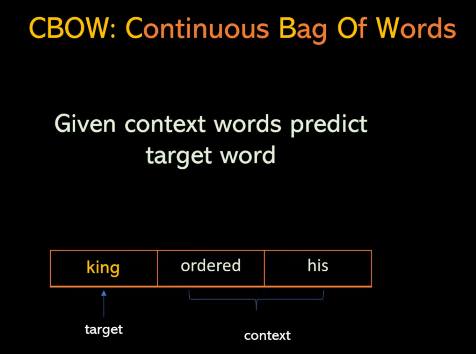

From the given context we try to find the target variable in CBOW.

**Skip Gram**

We have another method , in which we actually perform the opposite task.
This process is known as skip gram and it looks like this:
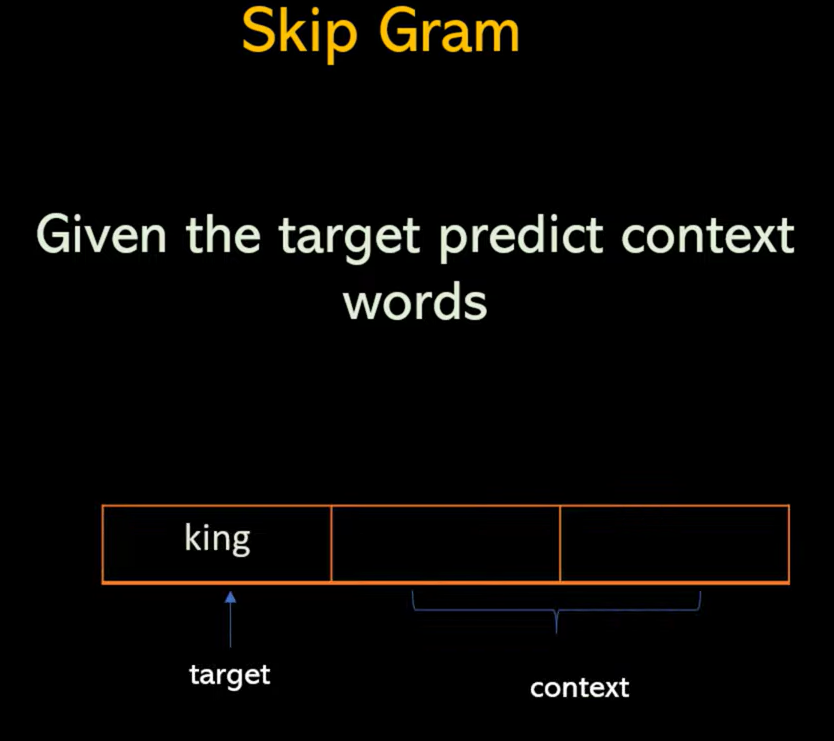


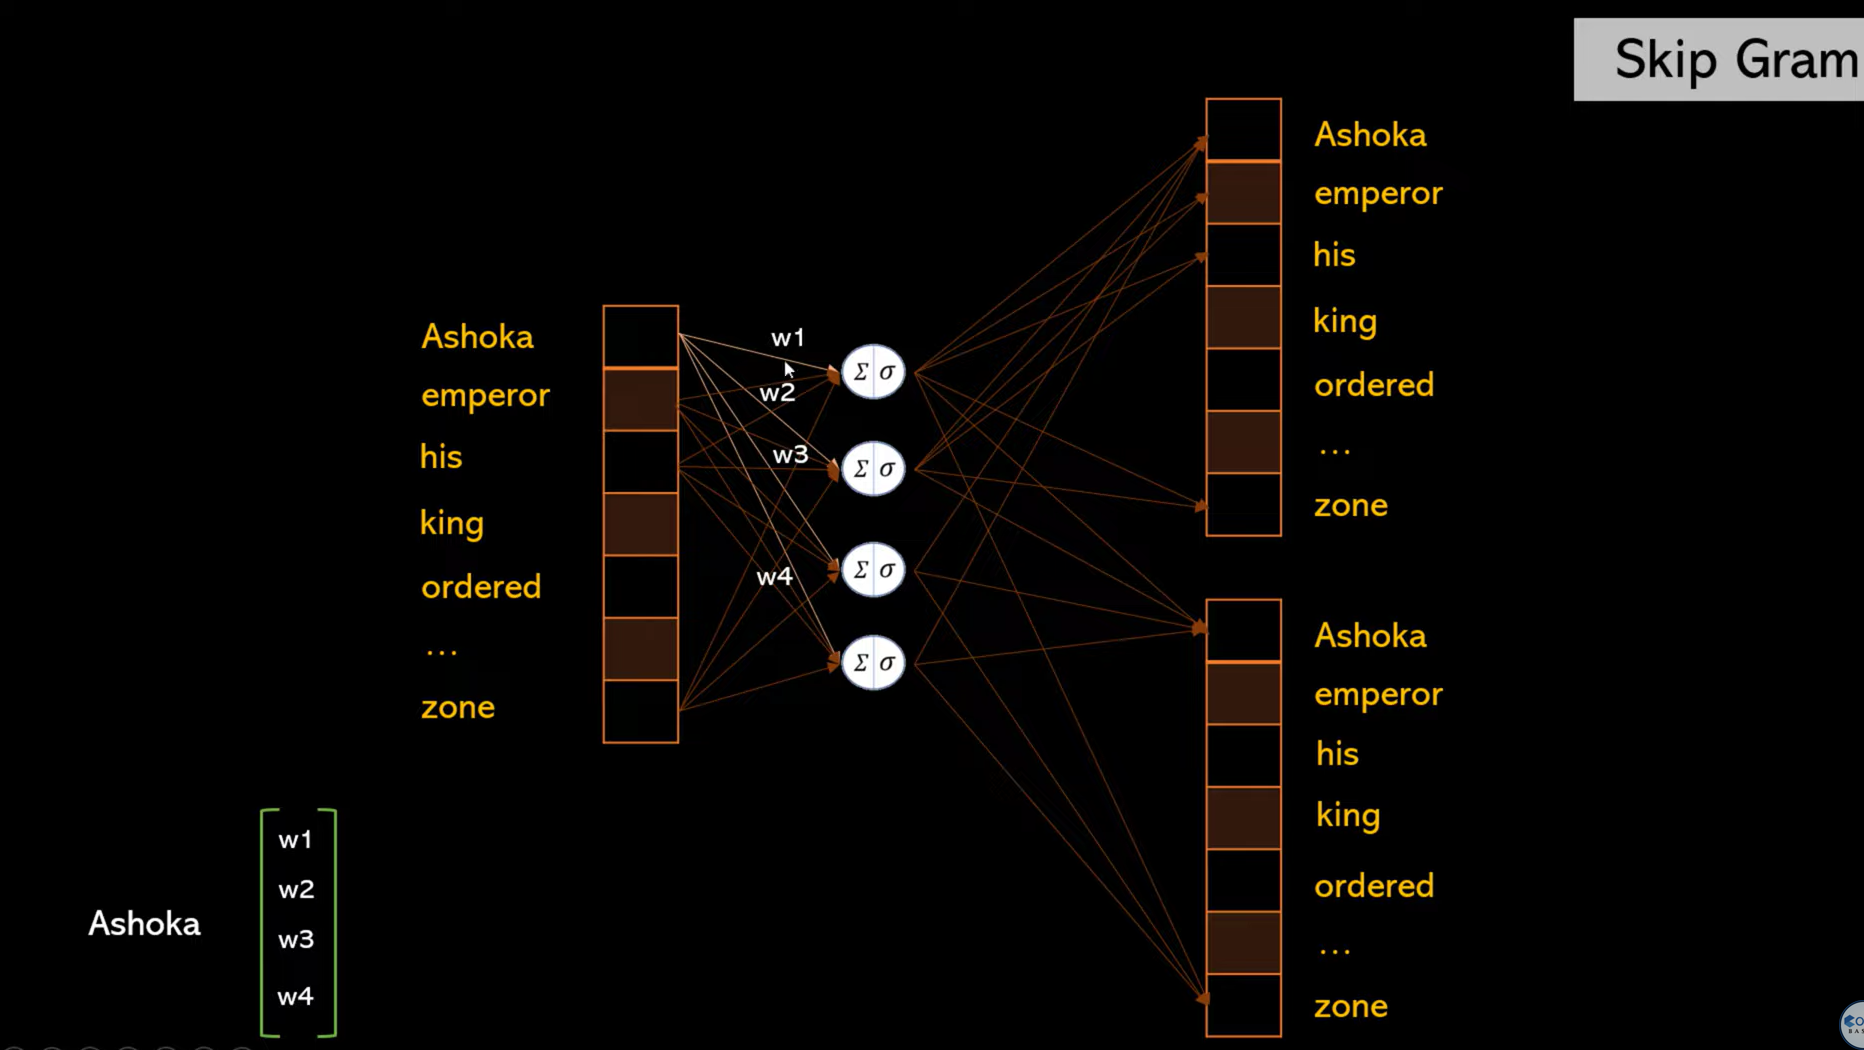

**Note: For skip gram the word embeddings are the weight between the input layer and the hidden layer whereas for cbow the word embeddings are the vectors between the hidden layer and the output layer**

***CODE***

We are using amazon product review for cellphone acessories.

In [1]:
!pip install gensim

Gensim is an open-source Python library for unsupervised topic modeling and natural language processing (NLP), especially focused on working with word embeddings like Word2Vec, Doc2Vec, FastText, and Latent Dirichlet Allocation (LDA).

In [2]:
import gensim
import pandas as pd

In [4]:
df=pd.read_json("/content/Cell_Phones_and_Accessories_5.json",lines=True)

In [6]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [8]:
df.shape

(194439, 9)

In [9]:
df["reviewText"][0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

The below function of gensim simply perform the functions like removing tabs, converting to lower texts etc.

In [10]:
gensim.utils.simple_preprocess("They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again")

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [11]:
review_text=df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

,reviewText
0,"[they, look, good, and, stick, good, just, don..."
1,"[these, stickers, work, like, the, review, say..."
2,"[these, are, awesome, and, make, my, phone, lo..."
3,"[item, arrived, in, great, time, and, was, in,..."
4,"[awesome, stays, on, and, looks, great, can, b..."
...,...
194434,"[works, great, just, like, my, original, one, ..."
194435,"[great, product, great, packaging, high, quali..."
194436,"[this, is, great, cable, just, as, good, as, t..."
194437,"[really, like, it, becasue, it, works, well, w..."


In [12]:
model=gensim.models.word2vec.Word2Vec(
    window=10, # ten words before your target word and 10 words after you target word
    min_count=2, # at least two words should be presented in the sentence
    workers=4 # how many threads of cpu are you using
)

In [13]:
model.build_vocab(review_text,progress_per=1000)

In [14]:
model.epochs

5

In [15]:
model.corpus_count # total examples

194439

In [16]:
model.train(review_text,total_examples=model.corpus_count,epochs=5)

(61505328, 83868975)

In [17]:
model.save("./word2vec-amazon-cell-accessories-short.model")


In [18]:
model.wv.most_similar("bad")

[('terrible', 0.6908109188079834),
 ('shabby', 0.6549345254898071),
 ('horrible', 0.6263507604598999),
 ('legit', 0.6031070947647095),
 ('good', 0.586243748664856),
 ('awful', 0.5849598050117493),
 ('okay', 0.5493927597999573),
 ('ok', 0.5416982173919678),
 ('funny', 0.5396645069122314),
 ('crappy', 0.5300039052963257)]

In [19]:
model.wv.similarity(w1="cheap",w2="inexpensive")

0.5082006